In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#llegim el nostre fitxer
dades = pd.read_excel('VeriDades.xlsx')

In [3]:
dades

,Autor/a,Departament,Date,Titol,URL,Gender
0,"Lario, David","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Influence of large-scale interplanetary struct...,/dspace/handle/2445/190067,male
1,"Alda, Javier","['Física Quàntica i Astrofísica', 'ICCUB']",2022,Using Machine Learning techniques in phenomeno...,/dspace/handle/2445/189626,male
2,"Asai, Makoto",['Física Quàntica i Astrofísica'],2021,The PENELOPE physics models and transport mech...,/dspace/handle/2445/189620,male
3,"Calvo Gomez, Miriam",['Física Quàntica i Astrofísica'],2017,Search for long-lived scalar particles in B+→K...,/dspace/handle/2445/186426,female
4,"Salvat Gavaldà, Francesc","['Física Quàntica i Astrofísica', 'ICCUB']",2021,Collisions of nucleons with atoms: calculated ...,/dspace/handle/2445/189531,male
...,...,...,...,...,...,...
4838,"Lane, David",['Enginyeria Electrònica i Biomèdica'],1997,AMADEUS: advanced manipulation for deep underw...,/dspace/handle/2445/8583,male
4839,"Samitier i Martí, Josep",['Enginyeria Electrònica i Biomèdica'],1998,A current-mode interface circuit for a piezore...,/dspace/handle/2445/8526,male
4840,"Prades García, Juan",['Enginyeria Electrònica i Biomèdica'],2008,The effects of electron-hole separation on the...,/dspace/handle/2445/7601,male
4841,"Prades García, Juan",['Enginyeria Electrònica i Biomèdica'],2006,Defect study of SnO2 nanostructures by cathodo...,/dspace/handle/2445/7581,male


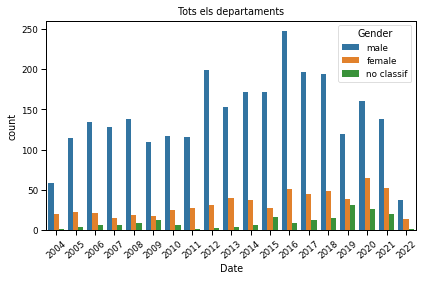

In [4]:
#fem una representació amb totes les dades
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=dades[dades["Date"] >= 2004])
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="Tots els departaments")

plt.tight_layout()
plt.savefig('tots.pdf', format='pdf', dpi=1200)

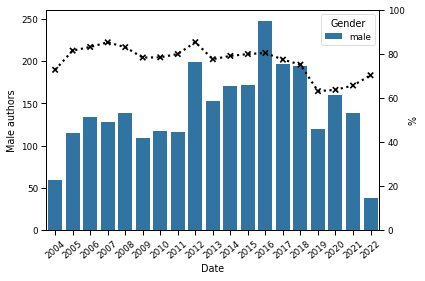

In [5]:
#farem un parell de gràfics (male/female) amb el percentatge representat també

temps = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

percent_male = []
percent_female = []

for anys in temps:
    gen = dades['Gender'][dades["Date"] == anys]
    m = 0
    f = 0
    for i in gen:
        if i == 'male':
            m = m + 1
        if i == 'female':  
            f = f + 1
            
    centm = (m/(len(gen)))*100
    centf = (f/(len(gen)))*100 
    
    percent_male.append(centm)
    percent_female.append(centf)
    
data= {'Date': temps, 'Male percentage': percent_male, 'Female percentage': percent_female}
df = pd.DataFrame(data)

#male authors
sns.set_context("paper", font_scale = 1)
g = sns.countplot(data=dades[dades["Date"] >= 2004], x='Date', hue='Gender', hue_order = ['male'])
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set_ylabel('Male authors')

ax2 = g.twinx()
ax2.set_ylabel('%')
ax2.set_ylim(0, 100)

m = sns.pointplot(x='Date', y='Male percentage', data=data, ax=ax2, markers = 'x', color = 'black', linestyles='dotted')

plt.tight_layout()
plt.savefig('male.pdf', format='pdf', dpi=1200)

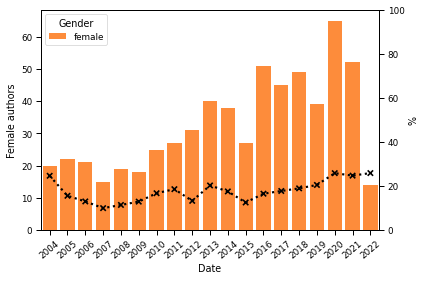

In [6]:
#farem un parell de gràfics (male/female) amb el percentatge representat també

temps = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

percent_male = []
percent_female = []

for anys in temps:
    gen = dades['Gender'][dades["Date"] == anys]
    m = 0
    f = 0
    for i in gen:
        if i == 'male':
            m = m + 1
        if i == 'female':  
            f = f + 1
            
    centm = (m/(len(gen)))*100
    centf = (f/(len(gen)))*100 
    
    percent_male.append(centm)
    percent_female.append(centf)
    
data= {'Date': temps, 'Male percentage': percent_male, 'Female percentage': percent_female}
df = pd.DataFrame(data)

sns.color_palette("rocket", as_cmap=True)
#female authors
sns.set_context("paper", font_scale = 1)
g = sns.countplot(data=dades[dades["Date"] >= 2004], x='Date', hue='Gender', hue_order = ['female'], palette= 'Oranges', saturation=1)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set_ylabel('Female authors')

ax2 = g.twinx()
ax2.set_ylabel('%')
ax2.set_ylim(0, 100)

m = sns.pointplot(x='Date', y='Female percentage', data=data, ax=ax2, markers = 'x', color = 'black', linestyles='dotted')

plt.tight_layout()
plt.savefig('female.pdf', format='pdf', dpi=1200)

In [7]:
#creem un dataset per cada departament

#Física Quàntica i Astrofísica
Departament_quantica1 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica']"]  
Departament_quantica2 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'ICCUB']"]
Departament_quantica3 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada']"]
Departament_quantica4 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB']"]
Departament_quantica5 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física Aplicada']"]
Departament_quantica6 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_quantica7 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_quantica8 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]

quantica = [Departament_quantica1, Departament_quantica2, Departament_quantica3, Departament_quantica4, Departament_quantica5,Departament_quantica6,Departament_quantica7, Departament_quantica8]
Departament_quantica = pd.concat(quantica)


#Física Aplicada
Departament_aplicada1 = dades[dades["Departament"] == "['Física Aplicada']"]
Departament_aplicada2 = dades[dades["Departament"] == "['Física Aplicada', 'IN2UB']"]
Departament_aplicada3 = dades[dades["Departament"] == "['Física Aplicada', 'Física de la Matèria Condensada']"]
Departament_aplicada4 = dades[dades["Departament"] == "['Física Aplicada', 'IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_aplicada5 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física Aplicada']"]
Departament_aplicada6 = dades[dades["Departament"] == "['Física Aplicada', 'Enginyeria Electrònica i Biomèdica']"]


aplicada = [Departament_aplicada1, Departament_aplicada2, Departament_aplicada3, Departament_aplicada4, Departament_aplicada5, Departament_aplicada6]
Departament_aplicada = pd.concat(aplicada)


#Física de la Matèria Condensada
Departament_condensada1 = dades[dades["Departament"] == "['Física de la Matèria Condensada']"]
Departament_condensada2 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'IN2UB']"]
Departament_condensada3 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'UBICS']"]
Departament_condensada4 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'IN2UB', 'UBICS']"]
Departament_condensada5 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'ICCUB']"]
Departament_condensada6 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'ICCUB']"]
Departament_condensada7 = dades[dades["Departament"] == "['Física Aplicada', 'Física de la Matèria Condensada']"]
Departament_condensada8 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_condensada9 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada']"]
Departament_condensada10 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB']"]
Departament_condensada11 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_condensada12 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_condensada13 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]

condensada = [Departament_condensada1, Departament_condensada2, Departament_condensada3, Departament_condensada4, Departament_condensada5, Departament_condensada6, Departament_condensada7, Departament_condensada8, Departament_condensada9,
             Departament_condensada10, Departament_condensada11, Departament_condensada12, Departament_condensada13]
Departament_condensada = pd.concat(condensada)


#Institut de Ciències del Cosmos (ICCUB)
Departament_cosmos1 = dades[dades["Departament"] == "['ICCUB']"]
Departament_cosmos2 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'ICCUB']"]
Departament_cosmos3 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'ICCUB']"]
Departament_cosmos4 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB']"]
Departament_cosmos5 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_cosmos6 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_cosmos7 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'ICCUB']"]


cosmos = [Departament_cosmos1, Departament_cosmos2, Departament_cosmos3, Departament_cosmos4, Departament_cosmos5, Departament_cosmos6, Departament_cosmos7]
Departament_cosmos = pd.concat(cosmos)


#Institut de Nanociència i Nanotecnologia (IN2UB)
Departament_nano1 = dades[dades["Departament"] == "['IN2UB']"]
Departament_nano2 = dades[dades["Departament"] == "['IN2UB', 'UBICS']"]
Departament_nano3 = dades[dades["Departament"] == "['Física Aplicada', 'IN2UB']"]
Departament_nano4 = dades[dades["Departament"] == "['IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_nano5 = dades[dades["Departament"] == "['Física Aplicada', 'IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_nano6 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'IN2UB']"]
Departament_nano7 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'IN2UB', 'UBICS']"]

nano = [Departament_nano1, Departament_nano2, Departament_nano3, Departament_nano4, Departament_nano5, Departament_nano6, Departament_nano7]
Departament_nano = pd.concat(nano)


#Institut de Sistemes Complexos
Departament_complex1 = dades[dades["Departament"] == "['UBICS']"]
Departament_complex2 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'UBICS']"]
Departament_complex3 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'IN2UB', 'UBICS']"]
Departament_complex4 = dades[dades["Departament"] == "['IN2UB', 'UBICS']"]

complexos = [Departament_complex1, Departament_complex2, Departament_complex3, Departament_complex4]
Departament_complex = pd.concat(complexos)



#Enginyeria Electrònica i Biomèdica
Departament_eng1 = dades[dades["Departament"] == "['Enginyeria Electrònica i Biomèdica']"]
Departament_eng2 = dades[dades["Departament"] == "['IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng3 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng4 = dades[dades["Departament"] == "['Física Aplicada', 'IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng5 = dades[dades["Departament"] == "['Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng6 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng7 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng8 = dades[dades["Departament"] == "['IN2UB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng9 = dades[dades["Departament"] == "['ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng10 = dades[dades["Departament"] == "['Física Quàntica i Astrofísica', 'Física de la Matèria Condensada', 'ICCUB', 'Enginyeria Electrònica i Biomèdica']"]
Departament_eng11 = dades[dades["Departament"] == "['Física Aplicada', 'Enginyeria Electrònica i Biomèdica']"]

enginyeria = [Departament_eng1, Departament_eng2, Departament_eng3, Departament_eng4, Departament_eng5, Departament_eng6, Departament_eng7, Departament_eng8, Departament_eng9, Departament_eng10, Departament_eng11]
Departament_eng = pd.concat(enginyeria)


In [8]:
#farem un dataset que agafi només les dades d'un cert interval de temps (comencem pel 2000 i aveure què tal)

Departament_Tquant = Departament_quantica[Departament_quantica["Date"] >= 2004]  
Departament_Tapli = Departament_aplicada[Departament_aplicada["Date"] >= 2004] 
Departament_Tconden = Departament_condensada[Departament_condensada["Date"] >= 2004] 
Departament_Tcosmo = Departament_cosmos[Departament_cosmos["Date"] >= 2004]
Departament_Tnano = Departament_nano[Departament_nano["Date"] >= 2004]
Departament_Tcomp = Departament_complex[Departament_complex["Date"] >= 2004]
Departament_Teng = Departament_eng[Departament_eng["Date"] >= 2004]

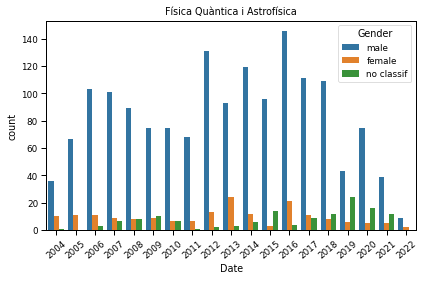

In [9]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tquant)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="Física Quàntica i Astrofísica")
plt.tight_layout()
plt.savefig('fqa.pdf', format='pdf', dpi=1200)

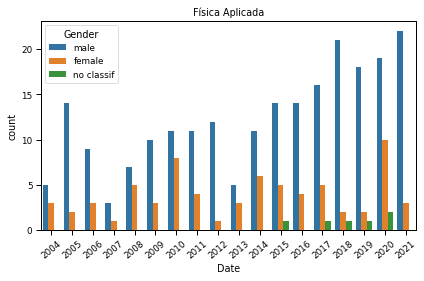

In [10]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tapli)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="Física Aplicada")
plt.tight_layout()
plt.savefig('fa.pdf', dpi=1200)

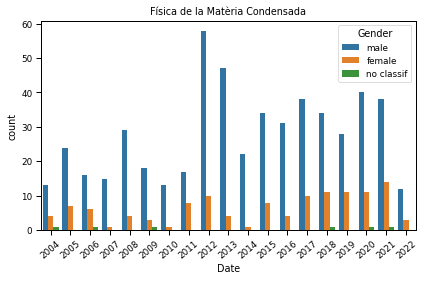

In [11]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tconden)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="Física de la Matèria Condensada")
plt.tight_layout()
plt.savefig('fmc.pdf', dpi=1200)

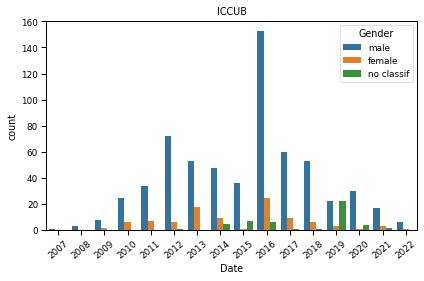

In [12]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tcosmo)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="ICCUB")
plt.tight_layout()
plt.savefig('iccub.pdf', dpi=1200)

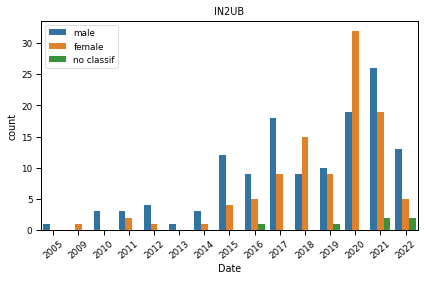

In [13]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tnano)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="IN2UB")
g.legend(loc='upper left')
plt.tight_layout()
plt.savefig('in2ub.pdf', dpi=1200)

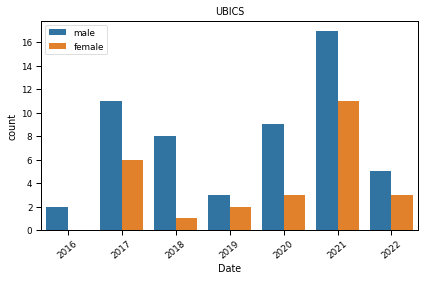

In [14]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Tcomp)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="UBICS")
g.legend(loc='upper left')
plt.tight_layout()
plt.savefig('ubics.pdf', dpi=1200)

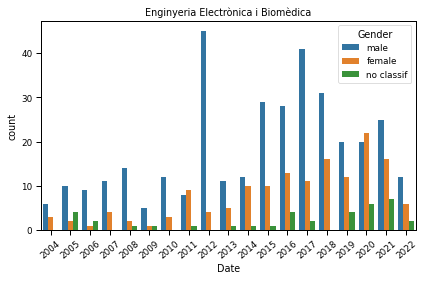

In [15]:
sns.set_context("paper", font_scale = 1)
g = sns.countplot(x='Date', hue='Gender', data=Departament_Teng)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
g.set(title="Enginyeria Electrònica i Biomèdica")
plt.tight_layout()
plt.savefig('eng.pdf', dpi=1200)